1. Importing all of the necessary modules from the Keras and Python
packages:

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

2. Load and display the image that we want to classify

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59258  100 59258    0     0   557k      0 --:--:-- --:--:-- --:--:--  561k


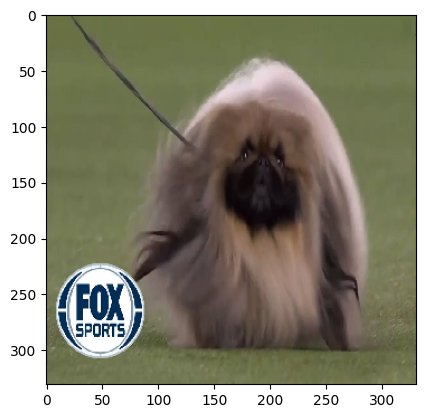

In [26]:
!curl https://i.ytimg.com/vi/22WNYSwplGs/hq720.jpg --output dog.jpg
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(331, 331))
plt.imshow(img)
plt.show()

3. Increase the number of dimensions for the shape of this newly created batch

In [22]:
img_array = image.img_to_array(img)
print("shape of original image: ", img_array.shape)

img_batch = np.expand_dims(img_array, axis=0)
print("shape of expanded image: ", img_batch.shape)

shape of original image:  (331, 331, 3)
shape of expanded image:  (1, 331, 331, 3)


4. **Normalization** (feature scaling). Scale the values of the pixel to the range [0,1] or [–1,1].

In [23]:
img_preprocessed = preprocess_input(img_batch)
print(img_preprocessed)

[[[[-0.16862744 -0.09803921 -0.46666664]
   [-0.16862744 -0.09803921 -0.46666664]
   [-0.16862744 -0.09803921 -0.46666664]
   ...
   [-0.19215685 -0.10588235 -0.44313723]
   [-0.19215685 -0.10588235 -0.44313723]
   [-0.19215685 -0.10588235 -0.44313723]]

  [[-0.16862744 -0.09803921 -0.46666664]
   [-0.16862744 -0.09803921 -0.46666664]
   [-0.16862744 -0.09803921 -0.46666664]
   ...
   [-0.19215685 -0.10588235 -0.44313723]
   [-0.19215685 -0.10588235 -0.44313723]
   [-0.19215685 -0.10588235 -0.44313723]]

  [[-0.17647058 -0.10588235 -0.47450978]
   [-0.17647058 -0.10588235 -0.47450978]
   [-0.17647058 -0.10588235 -0.47450978]
   ...
   [-0.19215685 -0.10588235 -0.44313723]
   [-0.19215685 -0.10588235 -0.44313723]
   [-0.19215685 -0.10588235 -0.44313723]]

  ...

  [[-0.12941176 -0.08235294 -0.36470586]
   [-0.12156862 -0.0745098  -0.35686272]
   [-0.11372548 -0.06666666 -0.3490196 ]
   ...
   [-0.12941176 -0.08235294 -0.38039213]
   [-0.09803921 -0.06666666 -0.35686272]
   [-0.09019607 

5. Load ResNet-50 model. (Convolutional Neural Network (CNN))

In [6]:
#model = tf.keras.applications.resnet50.ResNet50()
model = tf.keras.applications.NASNetLarge()
print(model.summary())

359748576/359748576 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "nasnet_large"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 331, 331, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv1 (Conv2D)       │ (None, 165, 165, 96)   │          2,592 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn1                  │ (None, 165, 165, 96)   │            384 │ stem_conv1[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 165, 165, 96)   │              0 │ stem_bn1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_conv_1_stem_1   │ (None, 165, 165, 42)   │          4,032 │ activation[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_bn_1_stem_1     │ (None, 165, 165, 42)   │            168 │ reduction_conv_1_stem… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 165, 165, 42)   │              0 │ reduction_bn_1_stem_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 165, 165, 96)   │              0 │ stem_bn1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 169, 169, 42)   │              0 │ activation_1[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 171, 171, 96)   │              0 │ activation_3[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 83, 83, 42)     │          2,814 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 83, 83, 42)     │          8,736 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 83, 83, 42)     │            168 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 83, 83, 42)     │            168 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 83, 83, 42)     │              0 │ separable_conv_1_bn_r… │
├──────────────────────

 Total params: 88,949,818 (339.32 MB)

 Trainable params: 88,753,150 (338.57 MB)

 Non-trainable params: 196,668 (768.23 KB)

None


5. Run the pretrained model on the image to get a list of category predictions and
their respective probabilities.

In [24]:
prediction = model.predict(img_preprocessed)
print(prediction.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(1, 1000)


6. Display a few of the highest probability categories.

In [25]:
print(decode_predictions(prediction, top=3)[0])

[('n02086079', 'Pekinese', 0.8984053), ('n02085782', 'Japanese_spaniel', 0.002050106), ('n02098413', 'Lhasa', 0.0016290381)]
